# Task 1: Exploratory Data Analysis (EDA) and Business Insights

##### #importing required libraries

In [288]:
#data manipulation library
import pandas as pd
import numpy as np

#data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

In [289]:
#Load csv files
customers=pd.read_csv('Customers.csv')
products=pd.read_csv('Products.csv')
transaction=pd.read_csv('Transactions.csv')

In [290]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [291]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [292]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


##### Data Cleaning

In [294]:
print(f'{customers.info()} \n')
print(f'{products.info()} \n')
print(f'{transaction.info()} \n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ----------

In [295]:
#checking null values
print(f'{customers.isnull().sum()} \n')
print(f'{products.isnull().sum()} \n')
print(transaction.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


##### Type conversions

In [297]:
customers['Region']=customers['Region'].astype('category')
customers['SignupDate']=pd.to_datetime(customers['SignupDate'])
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    category      
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 5.2+ KB


In [298]:
products['Category']=products['Category'].astype('category')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ProductID    100 non-null    object  
 1   ProductName  100 non-null    object  
 2   Category     100 non-null    category
 3   Price        100 non-null    float64 
dtypes: category(1), float64(1), object(2)
memory usage: 2.8+ KB


In [299]:
transaction['TransactionDate']=pd.to_datetime(transaction['TransactionDate'])
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


# Exploratory Data Analysis


In [301]:
#Merge all three datasets
customer_transaction=pd.merge(transaction, customers, on='CustomerID', how='left')
full_data=pd.merge(customer_transaction, products, on='ProductID', how='left')
full_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


## Business Insights

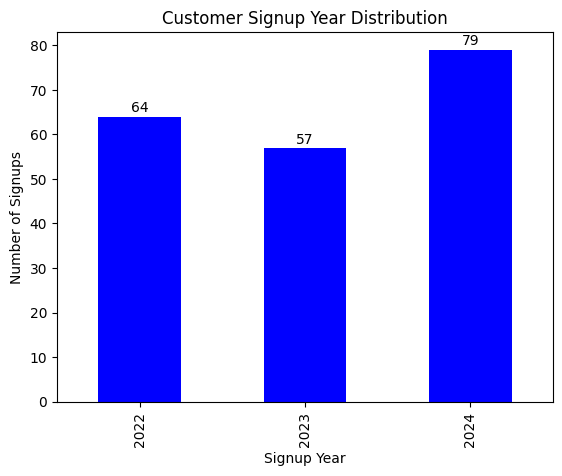

In [303]:
#Signup Year Distribution:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_year_counts = customers['SignupYear'].value_counts()
signup_year_counts=signup_year_counts.sort_index()


signup_year_counts.plot(kind='bar', title="Customer Signup Year Distribution", color='blue')
plt.xlabel('Signup Year')
plt.ylabel('Number of Signups')

for index, value in enumerate(signup_year_counts):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)


<Axes: title={'center': 'Customer Distribution by Region'}, ylabel='count'>

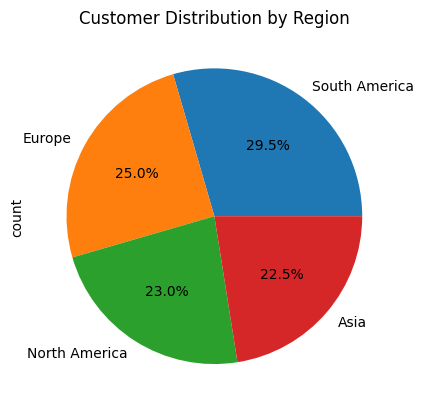

In [304]:
#Region-wise Customer Count
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='pie', autopct='%1.1f%%', title="Customer Distribution by Region" )


In [306]:
#Top 5 Customers by Revenue:
top_customers = (full_data.groupby(['CustomerID', 'CustomerName'])['TotalValue'].sum().sort_values(ascending=False).head(5))
print(top_customers)


CustomerID  CustomerName 
C0141       Paul Parsons     10673.87
C0054       Bruce Rhodes      8040.39
C0065       Gerald Hines      7663.70
C0156       William Adams     7634.45
C0082       Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


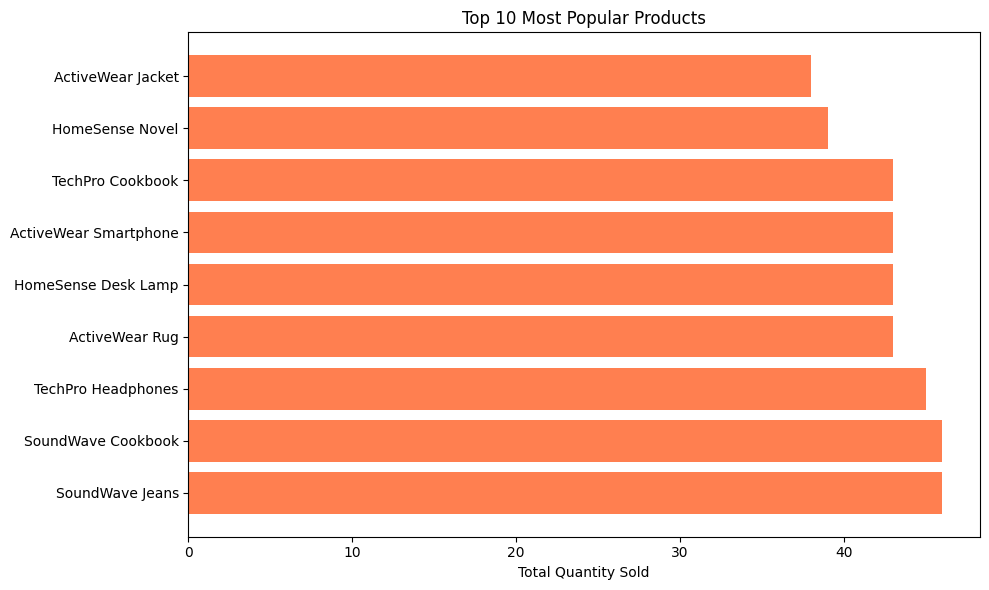

In [310]:
# Merge Transactions and Products DataFrames to get product details
product_sales = transaction.groupby('ProductID')['Quantity'].sum().reset_index()
product_sales = product_sales.merge(products[['ProductID', 'ProductName']], on='ProductID', how='left')

# Sort by Quantity to get the top 10 products
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_products['ProductName'], top_products['Quantity'], color='coral')
plt.xlabel('Total Quantity Sold')
plt.title('Top 10 Most Popular Products')
plt.tight_layout()
plt.show()


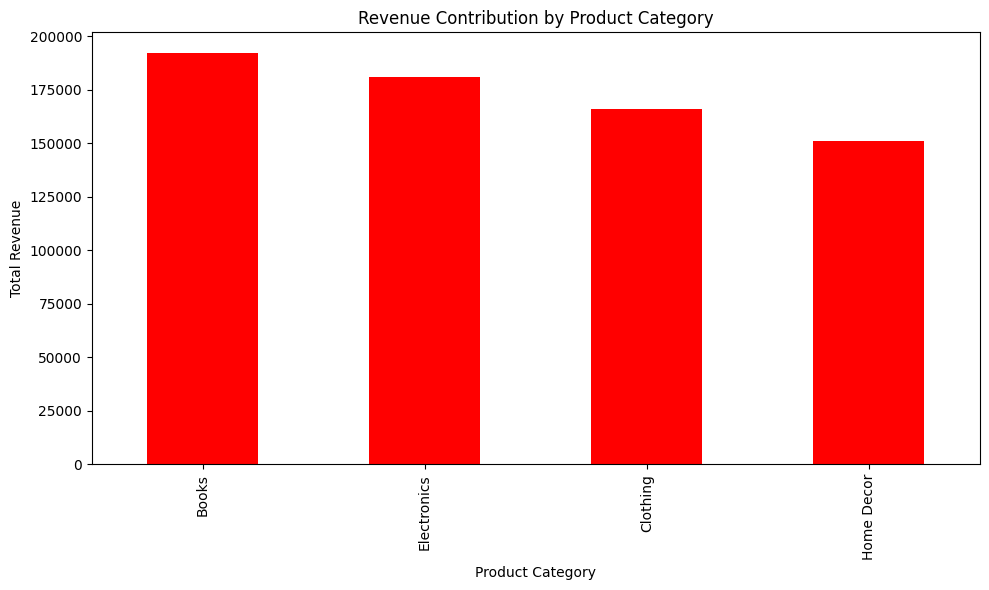

In [314]:
# Merge transactions with product details
full_data = transaction.merge(products, on='ProductID', how='left')

# Calculate revenue by category
category_revenue = full_data.groupby('Category',observed=True)['TotalRevenue'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='red', title="Revenue Contribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


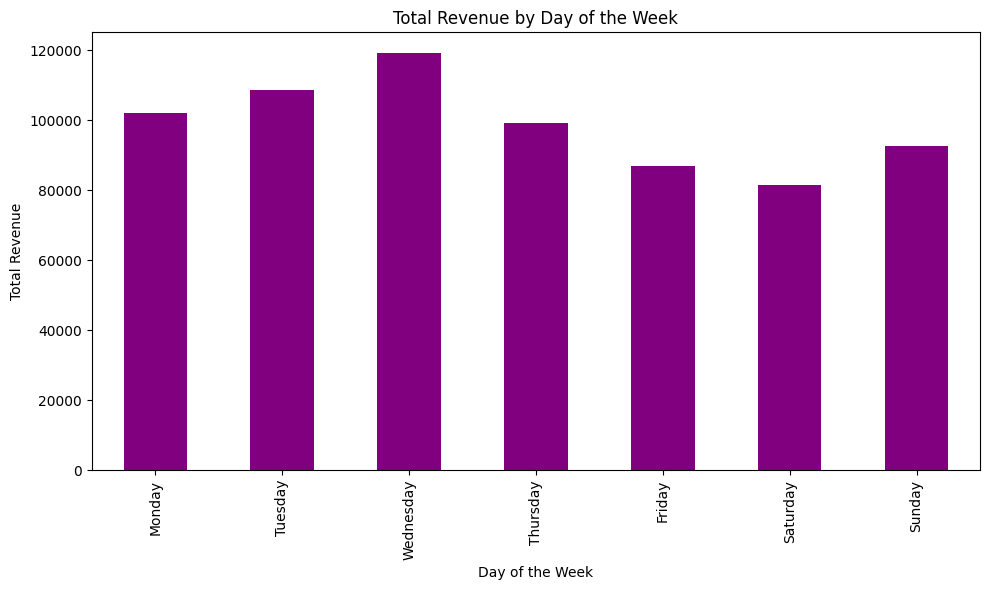

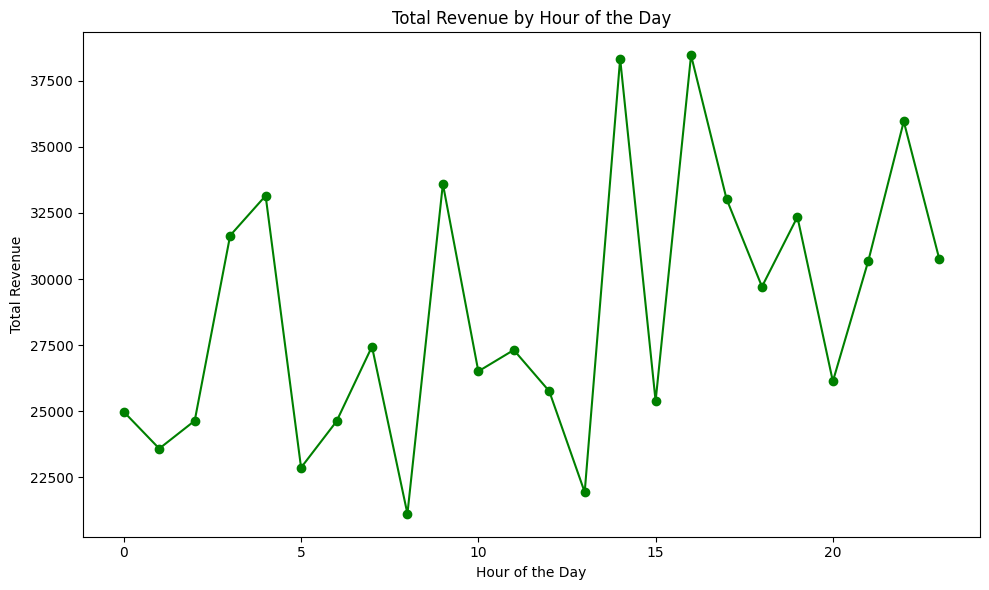

In [316]:
# Extract day of the week and hour of transaction
transaction['DayOfWeek'] = transaction['TransactionDate'].dt.day_name()
transaction['Hour'] = transaction['TransactionDate'].dt.hour

# Sales by day of the week
sales_by_day = transaction.groupby('DayOfWeek')['TotalRevenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='purple', title="Total Revenue by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# Sales by hour
sales_by_hour = transaction.groupby('Hour')['TotalRevenue'].sum()


plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='line', color='green', title="Total Revenue by Hour of the Day", marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


# Insights
##### <b>Signup Year Distribution</b>: Most customer signups occurred in recent years, showing growth in customer acquisition over time.
##### <b>Region-wise Customer Count</b>: Customers are predominantly from a few key regions, highlighting geographical concentration in the customer base.
##### <b>Top 5 Customers by Revenue</b>: A small subset of customers contributes significantly to total revenue, emphasizing the importance of high-value customers.
##### <b>Top 10 Most Popular Products</b>: A few products dominate sales, indicating a skewed preference toward specific items.
##### <b>Revenue Contribution by Product Category</b>: Certain product categories are the primary revenue drivers, showing varying profitability across categories.
##### <b>Transaction Patterns</b>: Revenue peaks on specific days of the week (e.g., weekends) and at certain hours, providing insights into customer behavior patterns.